## Stack Overflow Survey Analysis - a Data Scientist perspective
#### Created by: Pawel Wnuk Lipinski

The objective of the Notebook is to analyse the results of Stack Overflow Surveys, looking specifically from the perspecitve of Data Science field. The survey is run annually since 2011. Years 2018-2022 are being analysed.

<br> The survey data  and other related details can be found here:
<br>https://insights.stackoverflow.com/survey

By data analysis of the survey results I look for interesting insights related to Data Science field. I am looking for an answer to the following questions:
1. How do Data Scientists work (hybrid / remote / in-person)?
2. What is the education level of Data Scientists and how it has changed over time?
3. How Data Scientist learn to code?
4. How much Data Scientists earn and how much the salaries differ between countries?
5. What are the most popular technologies used?
6. Do mental health problems and accessibility issues affect Data Scientists?

### 1. Reading and Cleaning the data

#### 1.1 Reading the data 

In [1]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Usefull settings
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_columns', 500)
sns.set_style("darkgrid")

In [2]:
# For the purpose of this analysis I saved the the csv files with the survey results from the last 5 years (2018-2022)
# in the current working directory
!ls

'Stack Overflow Survey Analysis - a Data Scientist perspective-preliminary ver.ipynb'
'Stack Overflow Survey Analysis - a Data Scientist perspective.ipynb'
 survey_results_public_2018.csv
 survey_results_public_2019.csv
 survey_results_public_2020.csv
 survey_results_public_2021.csv
 survey_results_public_2022.csv


In [3]:
# The names of some columns have changed. The following mapping needs to be applied
cols_to_rename_2020 = {'LanguageDesireNextYear':'LanguageWantToWorkWith', 'LanguageWorkedWith': 'LanguageHaveWorkedWith', 
                        'MiscTechDesireNextYear': 'MiscTechWantToWorkWith', 'MiscTechWorkedWith': 'MiscTechHaveWorkedWith'}
cols_to_rename_2019 = cols_to_rename_2020
cols_to_rename_additionally_2018 = {'FormalEducation': 'EdLevel', 'CompanySize': 'OrgSize', 'Salary': 'CompTotal', 'SalaryType': 'CompFreq'}
cols_to_rename_2018 = {**cols_to_rename_2020, **cols_to_rename_additionally_2018}

In [4]:
# Reading the survey results into DataFrames and applying columns mapping where necessary
df_2022 = pd.read_csv('survey_results_public_2022.csv', low_memory=False)
df_2021 = pd.read_csv('survey_results_public_2021.csv', low_memory=False)
df_2020 = pd.read_csv('survey_results_public_2020.csv', low_memory=False).rename(columns=cols_to_rename_2020)
df_2019 = pd.read_csv('survey_results_public_2019.csv', low_memory=False).rename(columns=cols_to_rename_2019)
df_2018 = pd.read_csv('survey_results_public_2018.csv', low_memory=False).rename(columns=cols_to_rename_2018)

In [5]:
# Correcting the CurrencySymbol for DataFrames for 2021 and 2022
for df in [df_2021, df_2022]:
    df['CurrencySymbol'] = df['Currency'].str[:3]

In [6]:
# Picking the most interesting columns from the point of view of this particular analysis (key_columns)
# The loop will check if those columns are in all DataFrames
key_columns = ['DevType', 'RemoteWork', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert',
              'CurrencySymbol', 'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
               'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'Accessibility', 'MentalHealth']
dfs_year = {'2022': df_2022, '2021': df_2021, '2020': df_2020, '2019': df_2019, '2018': df_2018}

for k, v in dfs_year.items():
    print(f'***** DATA FOR YEAR: {k} *****')
    for col in key_columns:
        if col not in v.columns:
            print(f'Column {col} not in DF')   

***** DATA FOR YEAR: 2022 *****
***** DATA FOR YEAR: 2021 *****
Column RemoteWork not in DF
Column LearnCodeOnline not in DF
Column LearnCodeCoursesCert not in DF
***** DATA FOR YEAR: 2020 *****
Column RemoteWork not in DF
Column LearnCode not in DF
Column LearnCodeOnline not in DF
Column LearnCodeCoursesCert not in DF
Column Accessibility not in DF
Column MentalHealth not in DF
***** DATA FOR YEAR: 2019 *****
Column RemoteWork not in DF
Column LearnCode not in DF
Column LearnCodeOnline not in DF
Column LearnCodeCoursesCert not in DF
Column Accessibility not in DF
Column MentalHealth not in DF
***** DATA FOR YEAR: 2018 *****
Column RemoteWork not in DF
Column LearnCode not in DF
Column LearnCodeOnline not in DF
Column LearnCodeCoursesCert not in DF
Column MiscTechHaveWorkedWith not in DF
Column MiscTechWantToWorkWith not in DF
Column Accessibility not in DF
Column MentalHealth not in DF


There are some columns that were added just in the newest survey like 'RemoteWork', 'LearnCodeOnline' or 'LearnCodeCoursesCert'. The survey questions change nearly every year. Depending on which business question will be answered, there can be one or more years of available data.

In [7]:
# Looking at the first 3 rows of 2022 DF
df_2022.head(3)

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly,CurrencySymbol
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,macOS,Windows Subsystem for Linux (WSL),Git,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very unfavorable,Collectives on Stack Overflow;Stack Overflow for Teams (private knowledge sharing & collaboration platform for companies);Stack Overflow;Stack Exchange,Daily or almost daily,Yes,Daily or almost daily,Not sure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN,CAD
2,3,"I am not primarily a developer, but I write code sometimes as part of my work","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;Friend or family member;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)",Technical documentation;Blogs;Programming Games;Written Tutorials;Stack Overflow,NaN,14,5,"Data scientist or machine learning specialist;Developer, front-end;Engineer, data;Engineer, site reliability",20 to 99 employees,I have some influence,NaN,United Kingdom of Great Britain and Northern Ireland,GBP\tPound sterling,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,Notepad++;Visual Studio,Notepad++;Visual Studio,Windows,Windows,Git,Code editor,NaN,NaN,NaN,NaN,Microsoft Teams,Microsoft Teams,Very unfavorable,Collectives on Stack Overflow;Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,Neutral,25-34 years old,Man,No,Bisexual,White,None of the above,"I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.);I have an anxiety disorder",No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0,GBP


#### 1.2 Useful functions
In order to not necessarily repeat the code, a few helper functions are prepared as below.

In [8]:
def unique_categories(df, column):
    """The function takes a DataFrame and one categorical column as input. 
    It returns unique categories for the particular column."""
    categories = []
    for elem in list(df[column].unique()):
        x = str(elem).split(';')
        for x_elem in x:
            if x_elem not in categories:
                categories.append(x_elem)
    if 'nan' in categories:
        categories.remove('nan')
    return categories

In [9]:
def prepare_perc_relplot(years_dict, items_to_iterate, col_name, title):
    """The function takes the following inputs:
        years_dict: a dictionary with keys, values as: year: DataFrame with Data Science input
        items_to_iterate: categories to plot for a particular column (col_name)
        col_name: name of the column to plot
        title: title of the chart
        It returns a DataFrame with proportions of categoris and plots a line plot of the results        
        """
    
    years = []
    props = []
    item_list = []

    for k, v in years_dict.items():
        for item in items_to_iterate:
            prop = v[v[col_name].astype(str).str.contains(item, regex=False)].shape[0] / v[col_name].notna().sum()
            years.append(k)
            props.append(prop)
            item_list.append(item)

    df_tmp = pd.DataFrame({'year': years, 'proportion_of_resource': props, 'item': item_list})
    df_tmp['proportion_of_resource'] = df_tmp['proportion_of_resource'].replace(0, np.nan)
    df_tmp = df_tmp.sort_values(by='year')
    
    sns.relplot(data=df_tmp, x='year', y='proportion_of_resource', hue='item', kind='line', legend='brief', height=8, aspect=11/8)\
    .set(title=title)
    plt.ylim(0, None)
    plt.show()
    return df_tmp

In [10]:
def prepare_bar_plot(df, items_to_iterate, col_name, title):
    
    """The function takes the following inputs:
    df: DataFrame with Data Science input
    items_to_iterate: categories to plot for a particular column (col_name)
    col_name: name of the column to plot
    title: title of the chart
    It returns a DataFrame with proportions of categoris and plots a bar plot of the results        
    """
    
    options = []
    props = []
    prop_dict = {}

    # Calculating proportions for each resource
    for option in items_to_iterate:
        prop = df[col_name].str.contains(option, regex=False).sum() / df[col_name].notna().sum()
        options.append(option)
        props.append(prop)

    prop_dict['survey_options'] = options
    prop_dict['props'] = props

    data=pd.DataFrame(prop_dict)
    data.sort_values(by='props', ascending=False, inplace=True)

    # Visualising the proportions
    plt.figure(figsize=(10, 8))
    ax = sns.barplot(data=data, x='survey_options', y='props', color='dodgerblue')
    ax.set_title(title)
    ax.set_ylabel("Proportion")
    plt.xticks(rotation=90)
    plt.show()

#### 1.3 Narrowing the analysis to Data Science

Checking all available categories of 'DevType' column, one category refers to Data Science. Namely it is 'Data scientist or machine learning specialist'. The data will be further filtered by this developer type.

In [11]:
# Looking for unique categories of DevType column
unique_categories(df_2022, 'DevType')

['Data scientist or machine learning specialist',
 'Developer, front-end',
 'Engineer, data',
 'Engineer, site reliability',
 'Developer, full-stack',
 'Developer, back-end',
 'Developer, desktop or enterprise applications',
 'Developer, QA or test',
 'Student',
 'Developer, mobile',
 'Educator',
 'Engineering manager',
 'Database administrator',
 'Academic researcher',
 'DevOps specialist',
 'Other (please specify):',
 'Developer, embedded applications or devices',
 'Developer, game or graphics',
 'Project manager',
 'Cloud infrastructure engineer',
 'Data or business analyst',
 'Designer',
 'Scientist',
 'Product manager',
 'Senior Executive (C-Suite, VP, etc.)',
 'System administrator',
 'Blockchain',
 'Marketing or sales professional',
 'Security professional']

In [12]:
# Preparing a dictionary year: df, where df is a DataFrame filtered for Data Scientists only
dfs_ds_year = {year: df[df['DevType'].astype(str).str.contains("Data scientist")] for year, df in dfs_year.items()}

In [13]:
# Looking at the size of DS DataFrames
for k, v in dfs_ds_year.items():
    print(f' The shape of Data Science DF for year {k} is {v.shape}')

 The shape of Data Science DF for year 2022 is (3424, 80)
 The shape of Data Science DF for year 2021 is (4273, 49)
 The shape of Data Science DF for year 2020 is (3988, 61)
 The shape of Data Science DF for year 2019 is (6460, 85)
 The shape of Data Science DF for year 2018 is (7088, 129)


Let's check the proportion of Data Scientists in the whole group of survey participants

The proportion of Data Scientists in all SO survey participants for year 2022 is:  4.7%
The proportion of Data Scientists in all SO survey participants for year 2021 is:  5.1%
The proportion of Data Scientists in all SO survey participants for year 2020 is:  6.2%
The proportion of Data Scientists in all SO survey participants for year 2019 is:  7.3%
The proportion of Data Scientists in all SO survey participants for year 2018 is:  7.2%


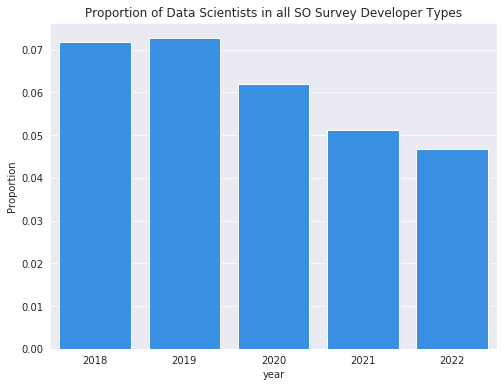

In [14]:
years = []
props = []
prop_dict = {}

for k, v in dfs_ds_year.items():
    prop = v.shape[0] / dfs_year[k].shape[0]
    print(f'The proportion of Data Scientists in all SO survey participants for year {k} is: {prop: .1%}')
    years.append(k)
    props.append(prop)
    
prop_dict['year'] = years
prop_dict['props'] = props

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=pd.DataFrame(prop_dict), x='year', y='props', color='dodgerblue')

ax.set_title("Proportion of Data Scientists in all SO Survey Developer Types")
ax.set_ylabel("Proportion")
plt.show()

Between around 5% to 7% of survey participants describe themselves as Data Scientists, which is just a fraction of all types of professions that use Stack Overflow. The whole analysis presented below relates only to the Data Science area of expertise.

### 2. Answering business questions
#### 2.1. How do Data Scientists work (hybrid / remote / in-person)?

To answer the question the 'RemoteWork' column needs to be analysed. It is available only in 2022 SO Survey, therefore it is not possible to analyse the changes in time (yet!). We can just look at the snapshot for 2022. If this column will be kept in the survey in the coming years the changes of working style in time can be analysed.

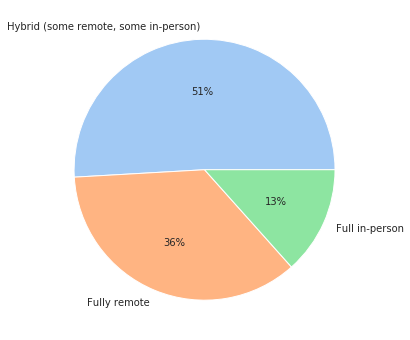

In [15]:
df_2022_ds = dfs_ds_year['2022']
df_temp = df_2022_ds['RemoteWork'].value_counts() / df_2022_ds['RemoteWork'].value_counts().sum()
df_temp = df_temp.reset_index()

# A pie-chart seems to be a good choice for this type of analysis
plt.figure(figsize=(8, 6))
colors = sns.color_palette('pastel')[0:3]
plt.pie(df_temp['RemoteWork'], labels = df_temp['index'], colors = colors, autopct='%.0f%%')
plt.show()

Around a half of Data Scientist worked in a hybrid model in 2022. 36% worked fully remotely and only 13% fully in-person. This information seems to be particularly important for companies that are willing to hire Data Scientists. If we assume that those proportions represent the working style preferences of Data Science community a company that will require a full in-person attendance can lose an interest of on average around 7 out of eight candidates!

#### 2.2. What is the highest level of formal education of Data Scientists and how it has changed over time?
Analyzing 5 top most common formal education options

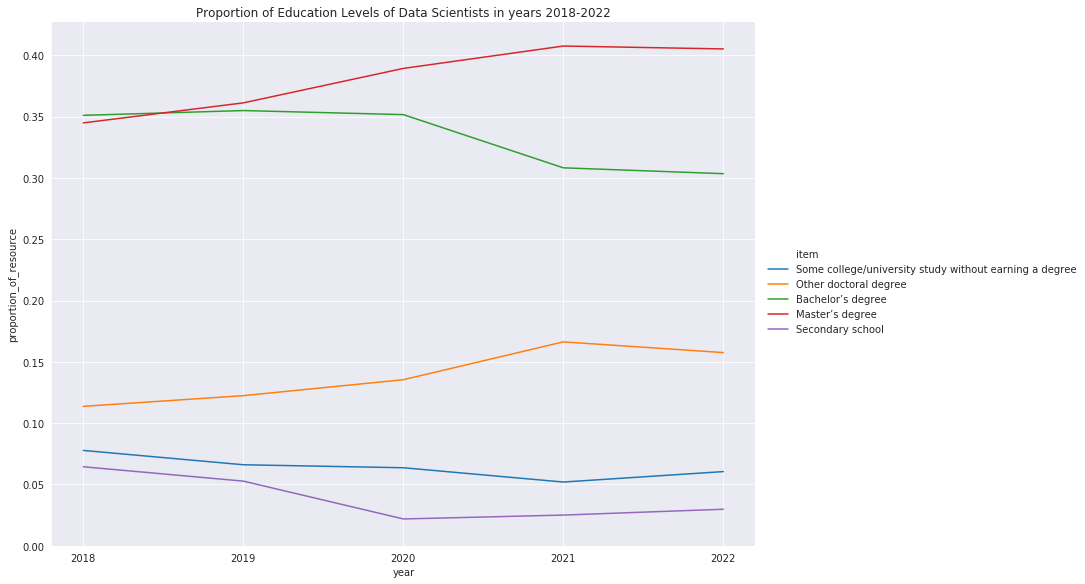

In [16]:
items_to_iterate = ['Master’s degree', 'Bachelor’s degree', 'Other doctoral degree', 'Secondary school',
                   'Some college/university study without earning a degree']
column = 'EdLevel'
title = 'Proportion of Education Levels of Data Scientists in years 2018-2022'

df = prepare_perc_relplot(dfs_ds_year, items_to_iterate, column, title)

In years 2018-2022 we observe increase in the highest levels of formal education (Master's and doctoral degrees) and decrease in the lower ones. This trends might be a result of Data Science requiring higher qualifications to be able to keep up with the more advanced technology that appears every year. On one side the Data Scientists might upskill themselves to get more advanced degrees. On the other side people who join this field have already an advanced degree.

#### 2.3. How Data Scientist learn to code?

There are three columns that can help to answer this question: 'LearnCode', 'LearnCodeOnline' and 'LearnCodeCoursesCert'.

#### 2.3.1 Learning to Code resources
The data is available for years 2021 and 2022 only. It shows answers to a question: *'How did you learn to code?'*. It's a multiple choice question.

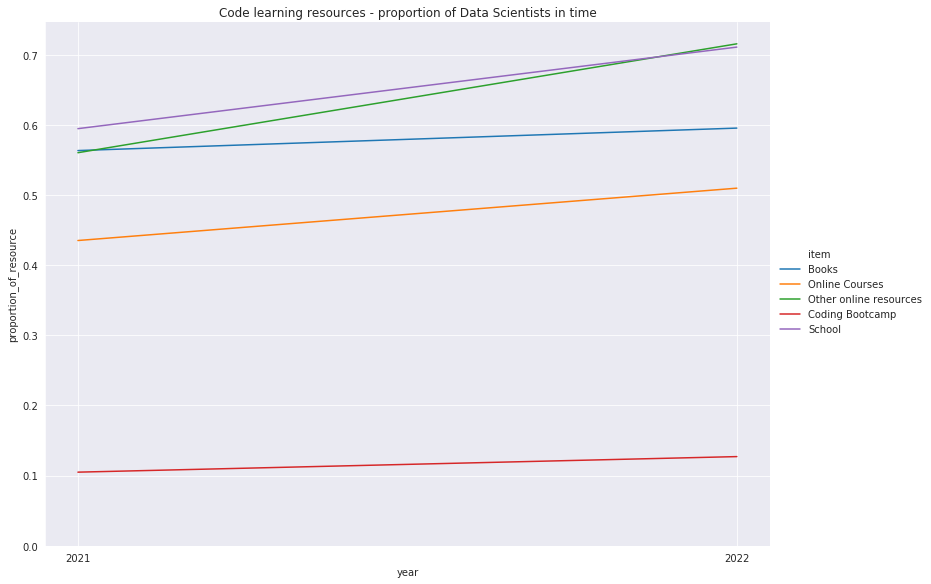

In [17]:
items_to_iterate = ['Books', 'Online Courses', 'Other online resources', 'Coding Bootcamp', 'School']
column = 'LearnCode'
title = 'Code learning resources - proportion of Data Scientists in time'
years_dict = {key: value for key, value in dfs_ds_year.items() if key in ['2021', '2022']} 

df = prepare_perc_relplot(years_dict, items_to_iterate, column, title)

Based on the chart above we can see that 'School' and 'other online resources' are the most important components in learning to code. Their importance raised in 2022. Books and online courses are also very important - more than a half of Data Scientists in 2022 learned coding using it. Coding Bootcamp is not a primary resource for learning to code.

#### 2.3.2. Online resources to learn to code

This question *What online resources do you use to learn to code?* was asked only in 2022 survey. It's a multiple choice question.

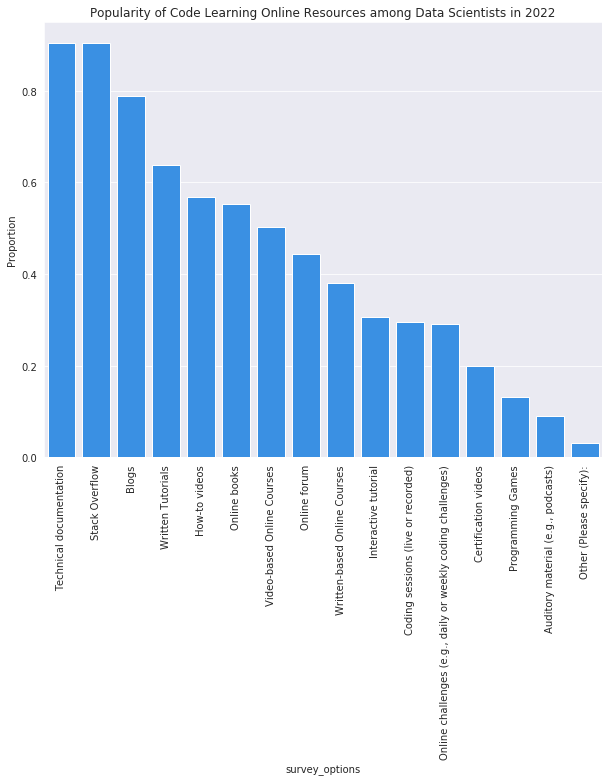

In [18]:
items_to_iterate = unique_categories(df_2022_ds, 'LearnCodeOnline')
column = 'LearnCodeOnline'
title = "Popularity of Code Learning Online Resources among Data Scientists in 2022"

prepare_bar_plot(df_2022_ds, items_to_iterate, column, title)

Technical documentation, stack overflow and blogs are the most popular learnign online resources.. More than 50% of Data Scientists use also written tutorials, how-to videos and online books. Certification videos, programming games and auditory materials (e.g. podcasts) are not very common.

#### 2.3.3. Online courses or certifications used to learn to code

This question *What online courses or certifications do you use to learn to code?* was asked only in 2022 survey. It's a multiple choice question.

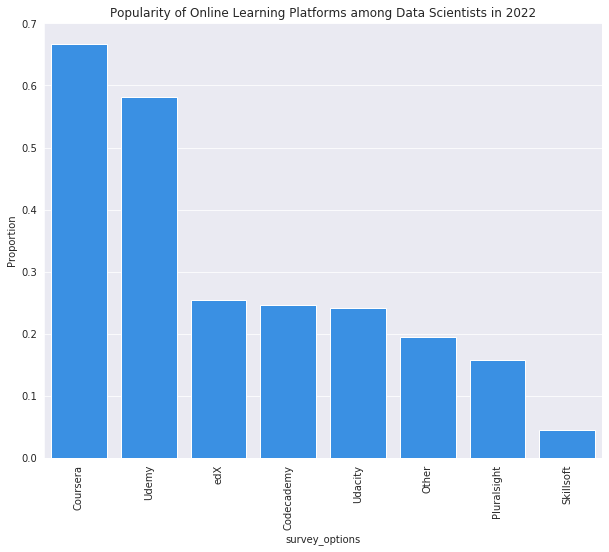

In [19]:
items_to_iterate = unique_categories(df_2022_ds, 'LearnCodeCoursesCert')
column = 'LearnCodeCoursesCert'
title = "Popularity of Online Learning Platforms among Data Scientists in 2022"

prepare_bar_plot(df_2022_ds, items_to_iterate, column, title)

By far the most common platforms are Coursera and Udemy. edX, Codecademy and Udacity are next and are being used by more than 20% of survey participants. If we assume that what is the most commonly used is the most useful, this is a valuable information for companies which want to upskill their employees and for Data Scienstists as well if they want to learn new skills.

#### 2.4. How much Data Scientists earn and how much the salaries differ between countries?

The analysis refers to total compensation before taxes for year 2022. <br>

To answer this question the following steps were taken:
* selecting 12 most common countries in the survey
* calculating the median monthly salary for each country
* converting the salary into EUR
* adding the cost of living index and looking at the salary from the cost perspective (additional analysis)

In [20]:
# Top 12 most common countries in the survey in 2022
list_of_countries = list(df_2022_ds['Country'].value_counts().head(12).index)
list_of_countries

['United States of America',
 'Germany',
 'India',
 'United Kingdom of Great Britain and Northern Ireland',
 'France',
 'Canada',
 'Brazil',
 'Netherlands',
 'Spain',
 'Italy',
 'Poland',
 'Switzerland']

In [21]:
# We need to map the country currency to its name for the further conversion to EUR
country_currency_dict = {'United States of America': 'USD',
 'Germany': 'EUR',
 'India': 'INR',
 'United Kingdom of Great Britain and Northern Ireland': 'GBP',
 'France': 'EUR',
 'Canada': 'CAD',
 'Brazil': 'BRL',
 'Netherlands': 'EUR',
 'Spain': 'EUR',
 'Italy': 'EUR',
 'Poland': 'PLN',
 'Switzerland': 'CHF'}

In [22]:
# average exchange rate in 2022 as of 30/12/2022 in relation to EUR based on www.exchangerates.org.uk
currency_eur_avg_dict = {'PLN': 4.6849, 'INR': 82.6909, 'USD': 1.0537, 'GBP': 0.8523, 'CAD': 1.369, 'BRL': 5.439, 'CHF': 1.004,'EUR': 1}
df_eur_curr_2022 = pd.DataFrame(currency_eur_avg_dict, index=[0]).T.reset_index().rename(columns={'index': 'Currency', 0: 'exchange_rate'})

In [23]:
def salary_median_calc(country, currency):
    """ The function takes country name and currency symbol as input and returns median monthly salary """
    salary = df_2022_ds[df_2022_ds['Country'] == country][['Currency', 'CompTotal' ,'CompFreq', 'CurrencySymbol']].dropna().copy()
    salary.loc[salary['CompFreq'].eq('Yearly'), 'CompTotal'] /= 12
    salary.loc[salary['CompFreq'].eq('Weekly'), 'CompTotal'] *= 52/12
    salary['CompFreq'] = 'Monthly'
    salary = salary[salary['CurrencySymbol'] == currency]
    return int(salary['CompTotal'].median())

In [24]:
# Creating a DataFrame with median salaries per country
countries = []
currencies = []
median_salaries = []

for country, currency in country_currency_dict.items():
    median_sal = salary_median_calc(country, currency)
    countries.append(country)
    currencies.append(currency)
    median_salaries.append(median_sal)

df_dict={'Country': countries, 'Currency': currencies, 'Median_Salary': median_salaries}
    
salaries_df = pd.DataFrame(df_dict)
salaries_df.set_index('Country')

,Currency,Median_Salary
Country,,
United States of America,USD,12500
Germany,EUR,5833
India,INR,200000
United Kingdom of Great Britain and Northern Ireland,GBP,5416
France,EUR,3916
Canada,CAD,11250
Brazil,BRL,9000
Netherlands,EUR,5000
Spain,EUR,4000


In [25]:
# Converting the median salary in the country's currency to EUR. 
# It is easier to compare salaries if they are represented in one common currency unit
salaries_df = pd.merge(salaries_df,df_eur_curr_2022, on='Currency', how='left')
salaries_df['Median_Salary_in_EUR'] = salaries_df['Median_Salary'] / salaries_df['exchange_rate']
salaries_df = salaries_df.sort_values(by='Median_Salary_in_EUR', ascending=False).set_index('Country')
salaries_df['Median_Salary_in_EUR'] = salaries_df['Median_Salary_in_EUR'].map('{:.0f}'.format)
salaries_df['exchange_rate'] = salaries_df['exchange_rate'].map('{:.3f}'.format)
salaries_df

,Currency,Median_Salary,exchange_rate,Median_Salary_in_EUR
Country,,,,
United States of America,USD,12500,1.054,11863
Switzerland,CHF,8750,1.004,8715
Canada,CAD,11250,1.369,8218
United Kingdom of Great Britain and Northern Ireland,GBP,5416,0.852,6355
Germany,EUR,5833,1.000,5833
Netherlands,EUR,5000,1.000,5000
Spain,EUR,4000,1.000,4000
France,EUR,3916,1.000,3916
Italy,EUR,3750,1.000,3750


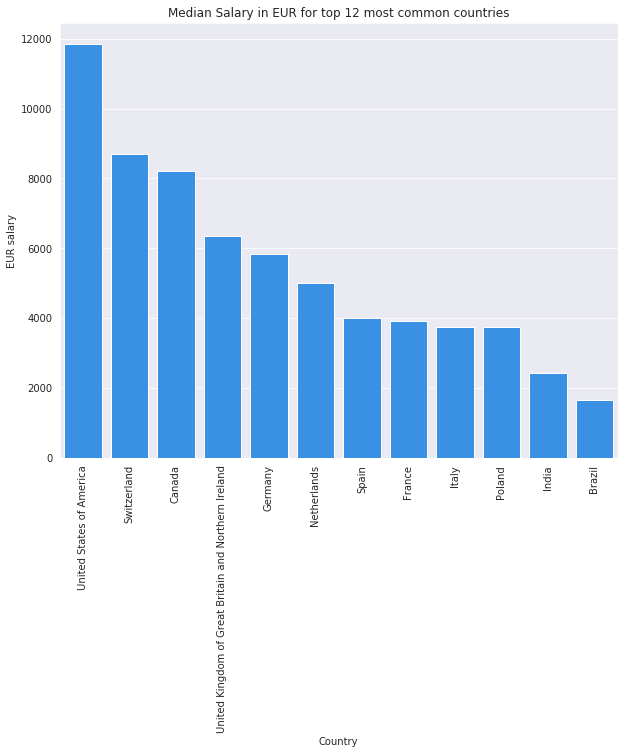

In [26]:
# Showing the median salary in EUR on a bar plot
salaries_df['Median_Salary_in_EUR'] = salaries_df['Median_Salary_in_EUR'].astype(int)
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=salaries_df.reset_index(), x='Country', y='Median_Salary_in_EUR', color='dodgerblue')
ax.set_title('Median Salary in EUR for top 12 most common countries')
ax.set_ylabel("EUR salary")
plt.xticks(rotation=90)
plt.show()

After converting the median monthly salary to one common currency (EUR) it is possible to compare it between countries. The range is very wide, from ca. 12k EUR per month in the USA to 1.6k in Brazil. This information can be very useful for Data Scientists looking for a job abroad. Also if a company is planning to build an international Team the information about median salary per country can be a good indicator of the people costs. For example a company based in the USA can hire 3 Data Scientists in Poland or 5 in India for the cost of one Data Scientist in the USA.

From the perspective of a Data Scientist looking for a job abroad, not only salary matters, but costs of living as well. The information about living costs is provided based on information from 'numbeo' website. 
'Cost of Living Plus Rent Index'is used, which is an estimation of consumer goods prices including rent comparing to New York City. The value of the index for New York City is 100.

In [27]:
# Source: https://www.numbeo.com/cost-of-living/rankings_by_country.jsp?title=2022&displayColumn=2
# Data for 2022
cost_of_living_plus_rent = {'United States of America': 57,
 'Germany': 47.8,
 'India': 15.5,
 'United Kingdom of Great Britain and Northern Ireland': 51.9,
 'France': 51.3,
 'Canada': 53.4,
 'Brazil': 21.5,
 'Netherlands': 57.1,
 'Spain': 38.6,
 'Italy': 44.9,
 'Poland': 27.5,
 'Switzerland': 90.6}

df_cost_index = pd.DataFrame(cost_of_living_plus_rent, index=[0]).T.reset_index().rename(columns={'index': 'Country', 0: 'cost_index'})

In [28]:
# Adding the cost index and information about financial wellbeing to the DataFrame
# The Financial wellbeing index is defined as median_salary_in_EUR / cost_index. 
salaries_df = pd.merge(salaries_df,df_cost_index, on='Country', how='left').set_index('Country')
salaries_df['Financial_wellbeing_index'] = (pd.to_numeric(salaries_df['Median_Salary_in_EUR']) / salaries_df['cost_index']).round()
salaries_df.sort_values(by='Financial_wellbeing_index', ascending=False)

,Currency,Median_Salary,exchange_rate,Median_Salary_in_EUR,cost_index,Financial_wellbeing_index
Country,,,,,,
United States of America,USD,12500,1.054,11863,57.0,208.0
India,INR,200000,82.691,2419,15.5,156.0
Canada,CAD,11250,1.369,8218,53.4,154.0
Poland,PLN,17500,4.685,3735,27.5,136.0
United Kingdom of Great Britain and Northern Ireland,GBP,5416,0.852,6355,51.9,122.0
Germany,EUR,5833,1.000,5833,47.8,122.0
Spain,EUR,4000,1.000,4000,38.6,104.0
Switzerland,CHF,8750,1.004,8715,90.6,96.0
Netherlands,EUR,5000,1.000,5000,57.1,88.0


While comparing not only the salary, but also taking into account costs of living the hierarchy of countries changes. Still USA is the top pick. However Switzerland which was top 2 according to salary only is on the 8th place when the cost of living is taken into account. Relatively good salary compared to costs have Data Scientists in India, Canada and Poland.

#### 2.5. What are the most popular technologies used?

#### 2.5.1. Most popular languages
The question asked in the survey is as follows: *Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?* It's a multiple choice question.<br>
Five languages are analysed in time: 'Python', 'R', 'Julia', 'Scala', 'SQL'.

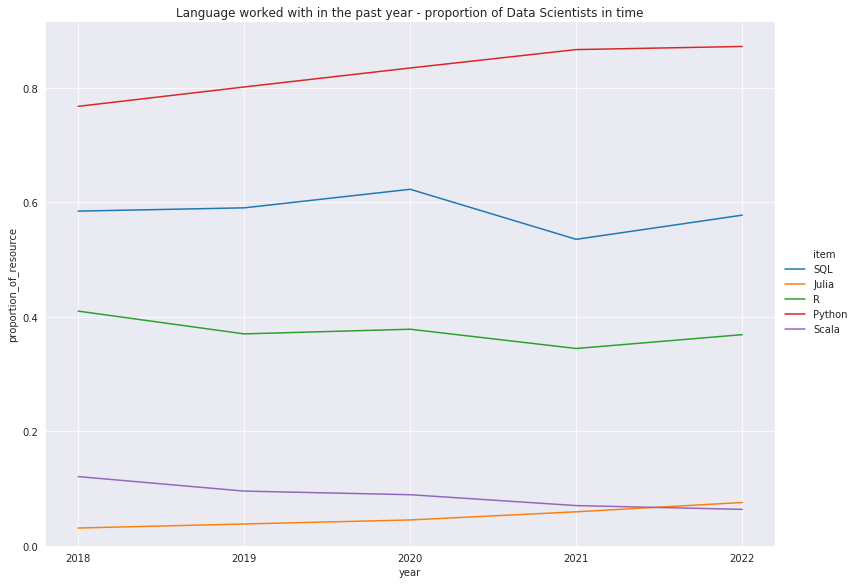

In [29]:
items_to_iterate = ['Python', 'R', 'Julia', 'Scala', 'SQL']
column = 'LanguageHaveWorkedWith'
title = 'Language worked with in the past year - proportion of Data Scientists in time'

df = prepare_perc_relplot(dfs_ds_year, items_to_iterate, column, title)

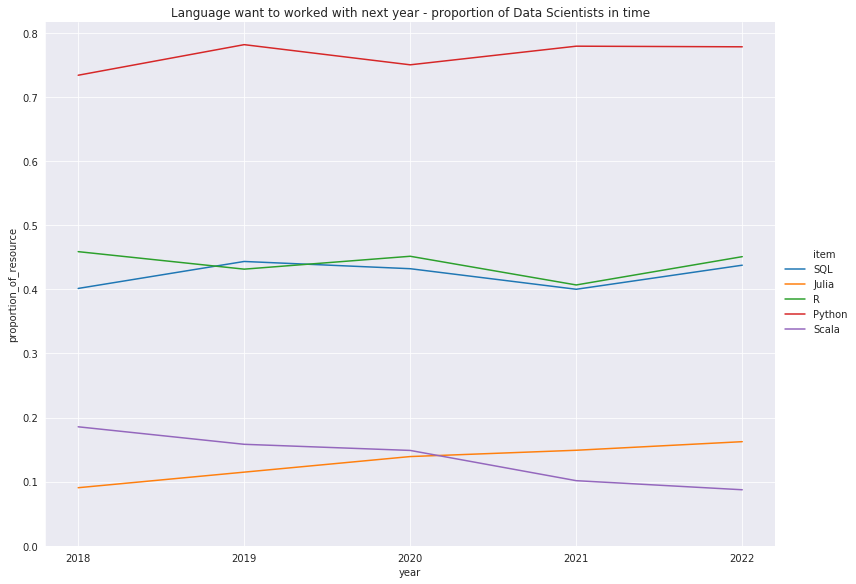

In [30]:
items_to_iterate = ['Python', 'R', 'Julia', 'Scala', 'SQL']
column = 'LanguageWantToWorkWith'
title = 'Language want to worked with next year - proportion of Data Scientists in time'

df = prepare_perc_relplot(dfs_ds_year, items_to_iterate, column, title)

Python is the most common language for Data Scientists. R and SQL are on the second place and the interest in them is stable in time. A growing interest in Julia and decreasing interest in Scala is visible. It will be interesting to observe Julia development in the upcoming years. Although the percentage of Data Scientists that used it is not high, there is a significant interest in applying this language in the coming year - more than 15% in 2022 survey results.
The above information can be an good indicator for people planning to switch to a Data Scientist role. Learning Python seems as an obvious first choice, with R and SQL on the second place.

#### 2.5.1. Most popular technologies
The question asked in the survey is as follows: *Which other frameworks and libraries have you done extensive development work in over the past year, and which do you want to work in over the next year?* It's a multiple choice question. <br>
The following technologies are analysed: 'Keras', 'NumPy', 'Pandas', 'Scikit-learn', 'TensorFlow', 'Torch/PyTorch'.

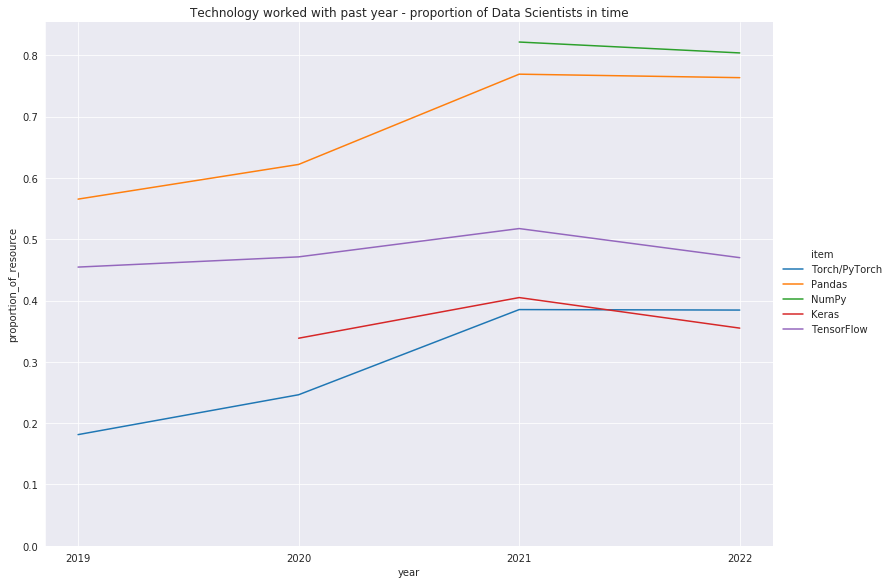

In [31]:
items_to_iterate = ['Keras', 'NumPy', 'Pandas', 'TensorFlow', 'Torch/PyTorch']
column = 'MiscTechHaveWorkedWith'
title = 'Technology worked with past year - proportion of Data Scientists in time'
years_dict = {key: value for key, value in dfs_ds_year.items() if key in ['2019', '2020', '2021', '2022']} 

df = prepare_perc_relplot(years_dict, items_to_iterate, column, title)

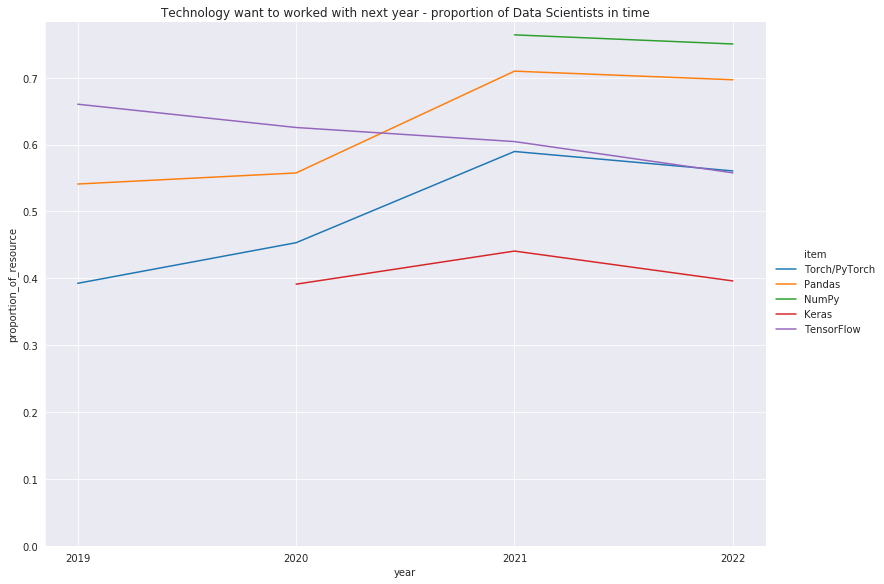

In [32]:
items_to_iterate = ['Keras', 'NumPy', 'Pandas', 'TensorFlow', 'Torch/PyTorch']
column = 'MiscTechWantToWorkWith'
title = 'Technology want to worked with next year - proportion of Data Scientists in time'

df = prepare_perc_relplot(years_dict, items_to_iterate, column, title)

Numpy and Pandas are the two top technologies among Data Scientists. Essentially that are Python libraries for data analysis and numerical computations. The other three technologies refer to deep learning. Tensorflow is the most popular one. However, when looking at the trends it looks that interest in Tensorflow is stable / decreasing and interest in Torch/PyTorch is rising.

#### 2.6. Do mental health problems and accessibility issues affect Data Scientists?

#### 2.6.1. Accessibility

The question regarding accessibility is: *Which of the following describe you, if any?* 
* I am blind / have difficulty seeing
* I am deaf / hard of hearing
* I am unable to / find it difficult to type
* I am unable to / find it difficult to walk or stand without assistance
* None of the above
* Prefer not to say

It's a multiple choice question.

In [33]:
items_to_iterate = unique_categories(df_2022_ds, 'Accessibility')
items_to_iterate.remove('Or, in your own words:') # this category has around 1.2% responses and does not give much information for the analysis

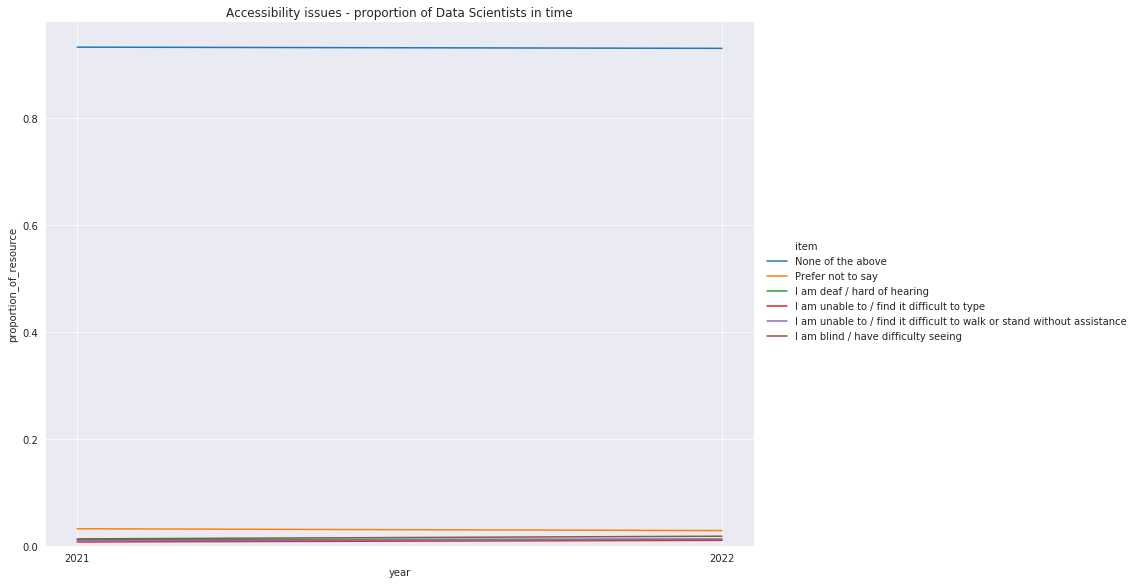

In [34]:
unique_categories(df_2022_ds, 'Accessibility')
column = 'Accessibility'
title = 'Accessibility issues - proportion of Data Scientists in time'
years_dict = {key: value for key, value in dfs_ds_year.items() if key in ['2021', '2022']} 

df_pivot = prepare_perc_relplot(years_dict, items_to_iterate, column, title)

The chart above is not very clear as one category 'None of the above' is dominating. Looking at the results in a form of a pivot table should be more informative.

In [35]:
pd_pivot = pd.pivot_table(df_pivot, values = 'proportion_of_resource', index= 'item', columns = 'year')\
.sort_values(by='2021', ascending=False).style.format({
    '2021': '{:,.2%}'.format,
    '2022': '{:,.2%}'.format
})
pd_pivot

year,2021,2022
item,,
None of the above,93.32%,93.10%
Prefer not to say,3.19%,2.85%
I am blind / have difficulty seeing,1.30%,1.80%
I am deaf / hard of hearing,1.12%,1.27%
I am unable to / find it difficult to walk or stand without assistance,0.90%,1.21%
I am unable to / find it difficult to type,0.72%,1.02%


In [36]:
items_to_iterate.remove('None of the above')
items_to_iterate.remove('Prefer not to say')
items_to_iterate

['I am deaf / hard of hearing',
 'I am unable to / find it difficult to type',
 'I am unable to / find it difficult to walk or stand without assistance',
 'I am blind / have difficulty seeing']

Looking at a chart, excluding the most common *'None of the above'* and *'Prefer not to say'* categories.

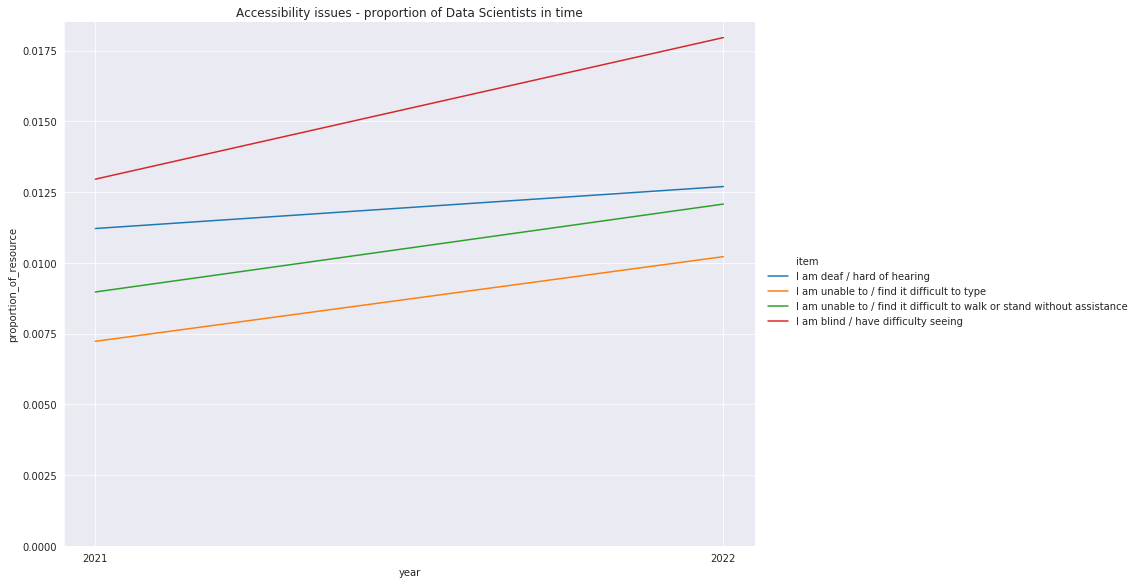

In [37]:
column = 'Accessibility'
title = 'Accessibility issues - proportion of Data Scientists in time'
years_dict = {key: value for key, value in dfs_ds_year.items() if key in ['2021', '2022']} 

df = prepare_perc_relplot(years_dict, items_to_iterate, column, title)

Based on the survey results we can say that accessibility issues affect around 7% of the population of Data Scientists. There are different issues raised like problems with typing, walking, seeing or hearing. Awareness of the fact that 7 out of 100 Data Scientists might have problems like that is critical, especially for companies hiring Data Scientists. For example, company policies regarding assitance for people with disabilities should be in place. Also recognizing the value of diversity and inclusion plays a key role here.

#### 2.6.2. MentalHealth

The question regarding mental health is: *Which of the following describe you, if any?*
* I have a concentration and/or memory disorder (e.g., ADHD, etc.)
* I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.)
* I have an anxiety disorder
* I have autism / an autism spectrum disorder (e.g. Asperger's, etc.)
* I have learning differences (e.g., Dyslexic, Dyslexia, etc.)
* None of the above
* Prefer not to say

It's a multiple choice question.

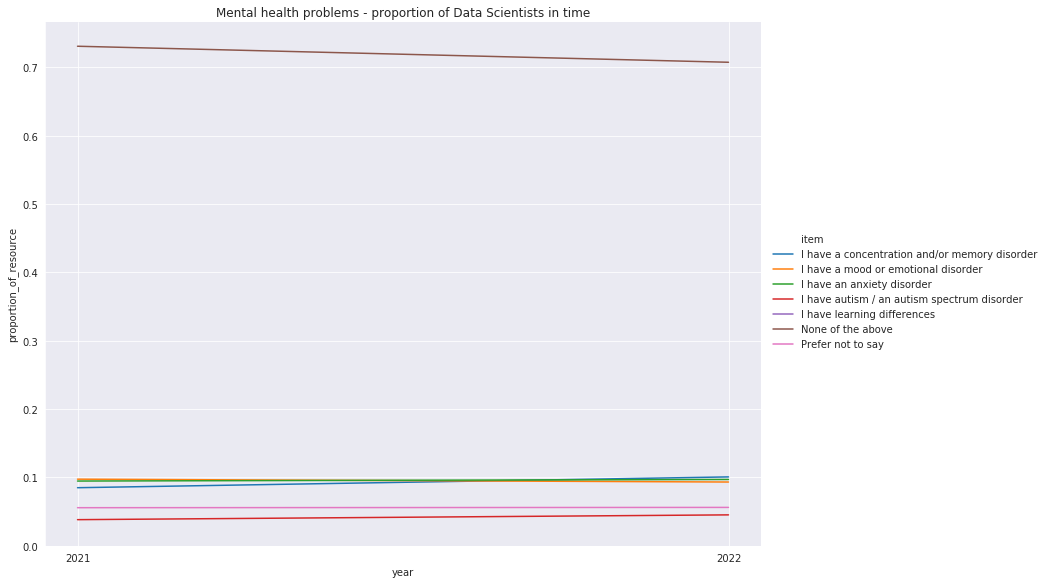

In [38]:
# Looking at a chart
items_to_iterate = ['I have a concentration and/or memory disorder', 'I have a mood or emotional disorder',
                'I have an anxiety disorder', "I have autism / an autism spectrum disorder",
                'I have learning differences', 'None of the above', 'Prefer not to say']
column = 'MentalHealth'
title = 'Mental health problems - proportion of Data Scientists in time'
years_dict = {key: value for key, value in dfs_ds_year.items() if key in ['2021', '2022']} 
df_pivot = prepare_perc_relplot(years_dict, items_to_iterate, column, title)

The chart above is not very clear as one category 'None of the above' is dominating. Looking at the results in a form of a pivot table should be more informative.

In [39]:
pd_pivot = pd.pivot_table(df_pivot, values = 'proportion_of_resource', index= 'item', columns = 'year')\
.sort_values(by='2021', ascending=False).style.format({
    '2021': '{:,.2%}'.format,
    '2022': '{:,.2%}'.format
})
pd_pivot

year,2021,2022
item,,
None of the above,73.10%,70.76%
I have a mood or emotional disorder,9.75%,9.33%
I have an anxiety disorder,9.47%,9.71%
I have a concentration and/or memory disorder,8.50%,10.08%
Prefer not to say,5.58%,5.62%
I have autism / an autism spectrum disorder,3.82%,4.53%
I have learning differences,nan%,3.34%


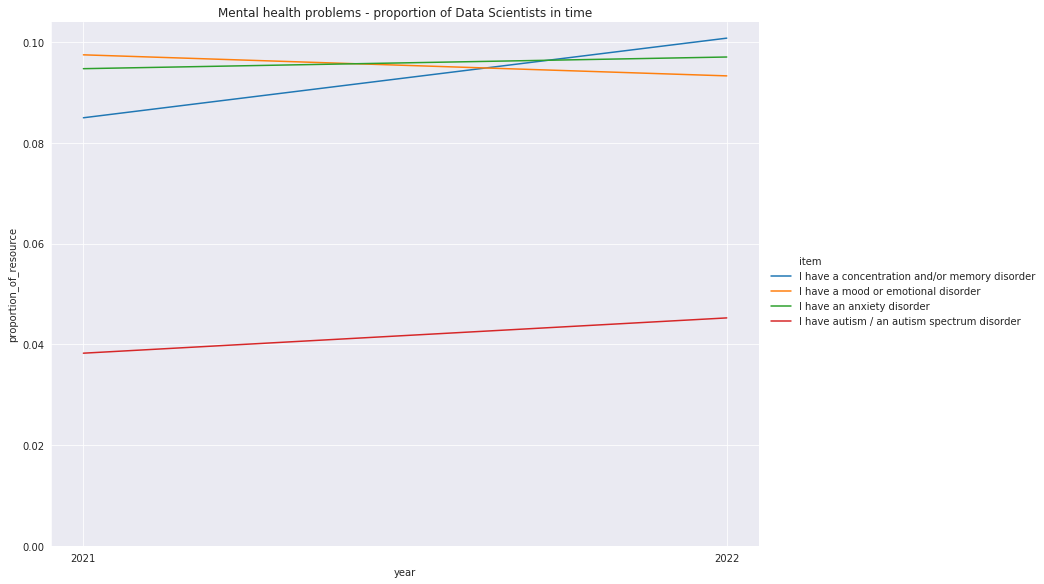

In [40]:
items_to_iterate = ['I have a concentration and/or memory disorder', 'I have a mood or emotional disorder',
                 'I have an anxiety disorder', "I have autism / an autism spectrum disorder"]
column = 'MentalHealth'
title = 'Mental health problems - proportion of Data Scientists in time'
years_dict = {key: value for key, value in dfs_ds_year.items() if key in ['2021', '2022']} 

df = prepare_perc_relplot(years_dict, items_to_iterate, column, title)

Based on the survey results around 30% of Data Scientists have various mental health problems. The most common are concentration and/or memory disorder, anxiety and mood or emotional disorder. Around 4% respondents have autism spectrum disorder. The results show that mental health problems really exist and in an average Team of 10 Data Scientists, 3 have various kinds of mental health issues. It is good that this question was added to stack overflow survey in 2021. Awareness that such problem exists and that the scale is significant is very informative, especially for companies hiring Data Scientists. If a company offers a support for people with mental health problems it could be a significant benefit not only for existing employees, but also for prospective ones. 

#### Summary

The analysis, which is based on the results from stack overflow survey in years 2018-2022, provided interesting insights related to the way Data Scientists work, their education level, ways to learn, salaries, most common technologies and touches important subjects like mental health and accessibility issues.
Depending on the reader, if that is a Data Scientist, aspiring Data Scientist or someone from a company managing and building Data Science Teams, everyone should find interesting information in the results of the analysis.